## Goal
#### In this challenge, participants will predict house rents using data science methods, machine learning, and hyperparameter tuning.

### Metric
* The submission will be evaluated using the RMSE metric. One can use ‘np. sqrt (Mean Squared Error)’ to calculate the same. [mean_squared_error(y_true, y_pred, squared=False)]
* The lower the RMSE, the better the score would be.


#### How to Generate the Submission File
* The participant should submit a .csv file with exactly  20203 rows with 2 column ["Property_ID, 'price']. The submission will return an Invalid Score if you have extra rows or columns.
* The file should have exactly 2 columns.


## Metadata

* 'Property_ID', = Unique id of the property
* 'room',  No. of rooms available
* ('layout_type',  ['BHK' 'RK']
* 'property_type', = ['Apartment' 'Studio Apartment' 'Independent Floor' 'Independent House' 'Villa' 'Penthouse']
* 'locality',  = Overall Locality description
* 'price', = Rent in INR
* 'area', = in Square Feet
* 'furnish_type', ['Semi-Furnished' 'Furnished' 'Unfurnished']
* 'bathroom',: No. of Bathrooms
* 'city', : ['Ahmedabad' 'Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai' 'Pune']
* 'parking_spaces',: 1 or 0  : 1 = Yes, 0 = No
* 'floor',: Floor from 0 to 20
* 'pet_friendly', : 1 or 0  : 1 = Yes, 0 = No
* 'power_backup', : 1 or 0  : 1 = Yes, 0 = No
* 'washing_machine',: 1 or 0  : 1 = Yes, 0 = No
* 'air_conditioner', : 1 or 0  : 1 = Yes, 0 = No
* 'geyser/solar',: 1 or 0  : 1 = Yes, 0 = No
* 'security_deposit', Amount of Security Deposit
* 'neighborhood', : Nearest Metro/Bus/Mall in meters
* 'CCTV/security : CCTV available 1 or 0  : 1 = Yes, 0 = No
* 'lift': 1 or 0  : 1 = Yes, 0 = No

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [2]:
# importing train and test data set
train = pd.read_csv('train_csv2022.csv')
test = pd.read_csv('test_csv2022.csv')

In [3]:
train.shape, test.shape

((114480, 21), (20203, 20))

# Exploratory Data Analysis

In [4]:
combined = pd.concat([train, test], ignore_index = True)

In [5]:
combined.shape

(134683, 21)

In [6]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134683 entries, 0 to 134682
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Property_ID       134683 non-null  int64  
 1   room              134683 non-null  int64  
 2   layout_type       134683 non-null  object 
 3   property_type     134683 non-null  object 
 4   locality          134683 non-null  object 
 5   area              134683 non-null  int64  
 6   furnish_type      134683 non-null  object 
 7   bathroom          134683 non-null  int64  
 8   city              134683 non-null  object 
 9   parking_spaces    134683 non-null  int64  
 10  floor             134683 non-null  int64  
 11  pet_friendly      134683 non-null  int64  
 12  power_backup      134683 non-null  int64  
 13  washing_machine   134683 non-null  int64  
 14  air_conditioner   134683 non-null  int64  
 15  geyser/solar      134683 non-null  int64  
 16  security_deposit  13

In [7]:
combined.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1500,4716.0
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,300,24969.0
2,120243,2,RK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1300,24146.0
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3600,36260.0
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,200,176156.0


In [8]:
# Numerical variables

nums = combined.select_dtypes(include = np.number).columns
nums

Index(['Property_ID', 'room', 'area', 'bathroom', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'security_deposit', 'CCTV/security', 'lift',
       'neighbourhood', 'price'],
      dtype='object')

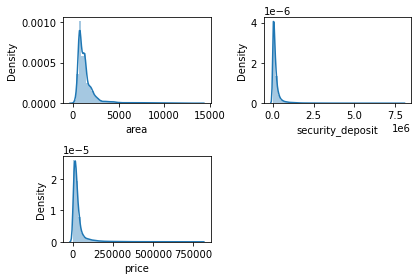

In [9]:
cols = ['area', 'security_deposit', 'price']
t = 1
for i in cols:
    plt.subplot(2,2,t)
    sns.distplot(combined[i])
    t += 1
    plt.tight_layout()
plt.show()

# All variables are skewed in nature.

In [10]:
# categorical variables
cat_cols = combined.select_dtypes(include = 'object').columns
cat_cols 

Index(['layout_type', 'property_type', 'locality', 'furnish_type', 'city'], dtype='object')

In [11]:
combined.city.value_counts()

Mumbai       46910
Delhi        22826
Bangalore    16092
Pune         15713
Ahmedabad    12976
Hyderabad     7334
Kolkata       6795
Chennai       6037
Name: city, dtype: int64

In [12]:
col_c = ['layout_type', 'property_type', 'city', 'furnish_type', 'room', 'bathroom', 
         'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar',  'CCTV/security', 'lift']
len(col_c)

15

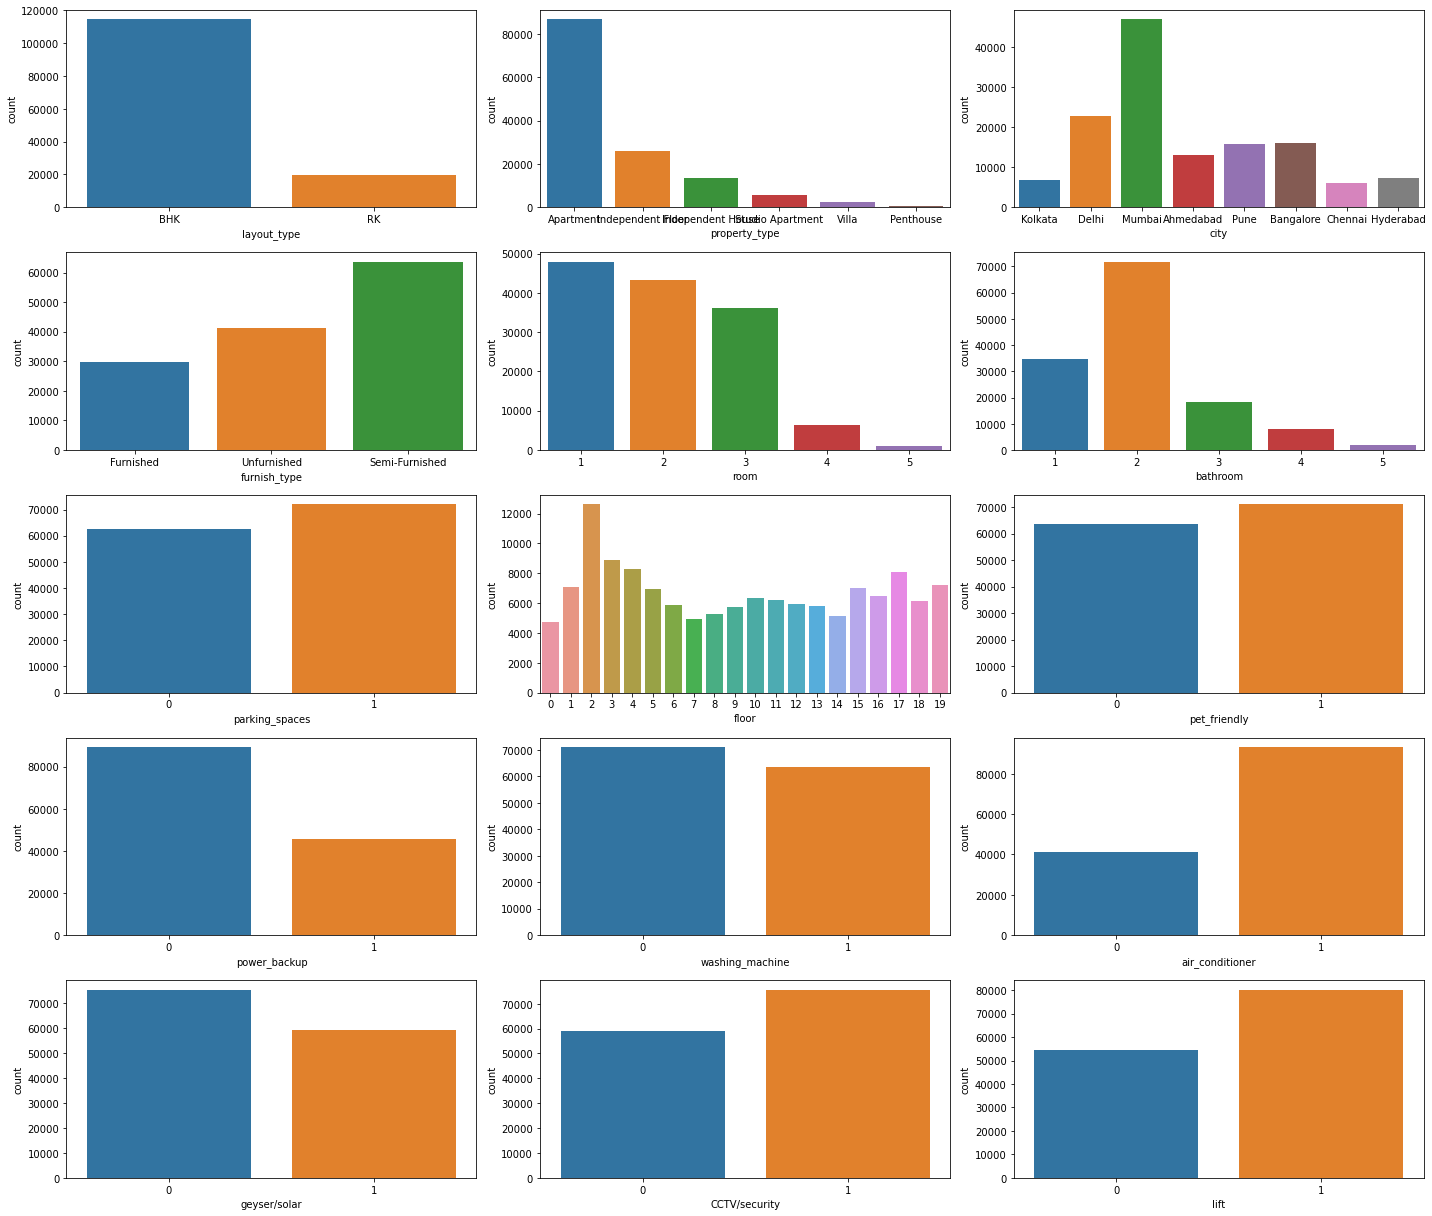

In [13]:
# visual presentation of categorical columns
plt.rcParams['figure.figsize'] = (20,17)
t = 1
for i in col_c:
    plt.subplot(5,3,t)
    sns.countplot(combined[i])
    t += 1
    plt.tight_layout()
plt.show()


#### Inferences:
* Most of the House rentals are seen in **Mumbai**
* Most of the properties have lift followed by CCTV and AC
* Properties dont have Geysers followed by Washing Machine and no power backup
* There are pet friendly Houses in data
* No. of Bedrooms ranges from 1 to 5
* Max Bedrooms are 5 and in data house ranges from 1BHK to 5BHK
* Most od the rentals are semi-furnished.
* Frequency of Apartments are more than any other types of properties in the data
* Generally people prefer rental on **2nd floor**.

In [14]:
# check missing values
combined.isnull().sum()

Property_ID             0
room                    0
layout_type             0
property_type           0
locality                0
area                    0
furnish_type            0
bathroom                0
city                    0
parking_spaces          0
floor                   0
pet_friendly            0
power_backup            0
washing_machine         0
air_conditioner         0
geyser/solar            0
security_deposit        0
CCTV/security           0
lift                    0
neighbourhood           0
price               20203
dtype: int64

In [15]:
plt.rcParams['figure.figsize'] = (12,8)

<AxesSubplot:xlabel='area', ylabel='price'>

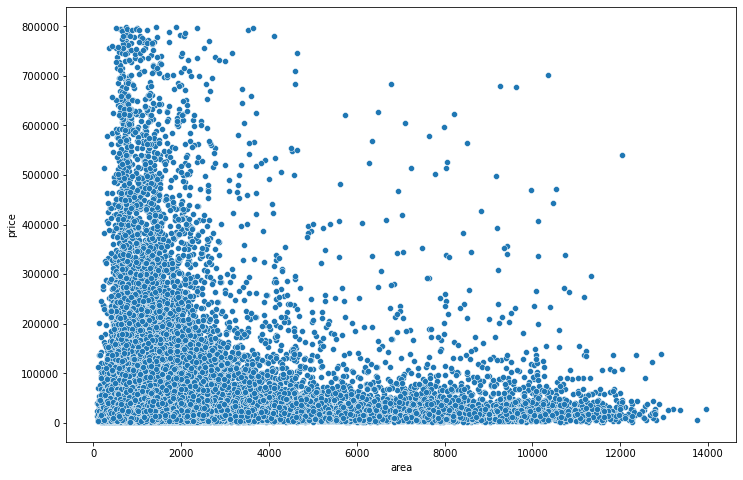

In [16]:
# Univariate Analysis
# area vs Price
sns.scatterplot(x = 'area', y = 'price', data = combined)

In [17]:
combined.loc[:, ['area', 'price']].corr()

,area,price
area,1.000000,0.021358
price,0.021358,1.000000


<AxesSubplot:xlabel='security_deposit', ylabel='price'>

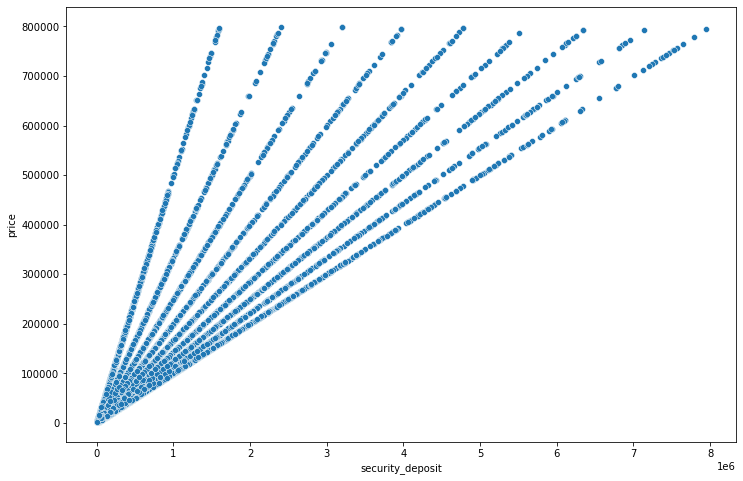

In [18]:
# security deposit vs price
sns.scatterplot(x = 'security_deposit', y = 'price', data = combined)

# security deposit varies a lot with th erental price

In [19]:
combined.loc[:, ['security_deposit', 'price']].corr()

,security_deposit,price
security_deposit,1.000000,0.898108
price,0.898108,1.000000


<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

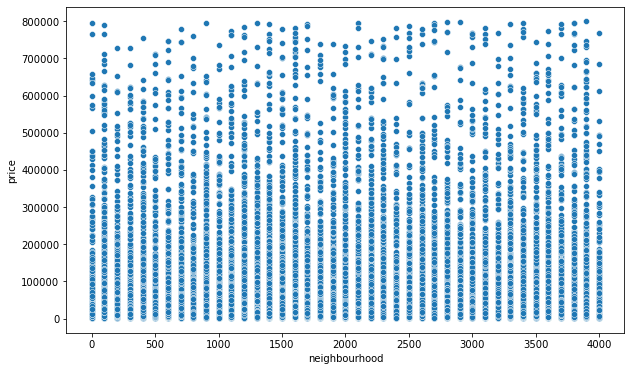

In [20]:
# neighbourhood vs price
#sns.scatterplot(x = 'neighbourhood', y = 'price', data = combined)
plt.rcParams['figure.figsize'] = (10,6)

sns.scatterplot(x = 'neighbourhood', y = 'price', data = combined)


In [21]:
# conver distance in KMS
combined['neighbourhood'] = combined['neighbourhood']/1000

# no effect seein in scatterplot

In [22]:
# let's bin the neighberhood in : viscinity, proximit , near and far
combined['neighbourhood'].describe()

count    134683.000000
mean          2.033024
std           1.159636
min           0.000000
25%           1.100000
50%           2.000000
75%           3.000000
max           4.000000
Name: neighbourhood, dtype: float64

In [23]:
def distance(x):
    if x< 2:
        return 'Near'
    else:
        return 'Far'

In [24]:
# binning 'neighbourhood' columns
combined['Neighbour_dist'] = combined['neighbourhood'].apply(distance)

In [25]:
combined['Neighbour_dist'].value_counts()

Far     68334
Near    66349
Name: Neighbour_dist, dtype: int64

In [26]:
combined.groupby('Neighbour_dist')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighbour_dist,,,,,,,,
Far,58127.0,36065.241867,62796.689464,1590.0,11518.0,20181.0,35101.5,799325.0
Near,56353.0,37371.730218,62751.642991,1624.0,12539.0,21579.0,36920.0,795827.0


<AxesSubplot:xlabel='Neighbour_dist', ylabel='price'>

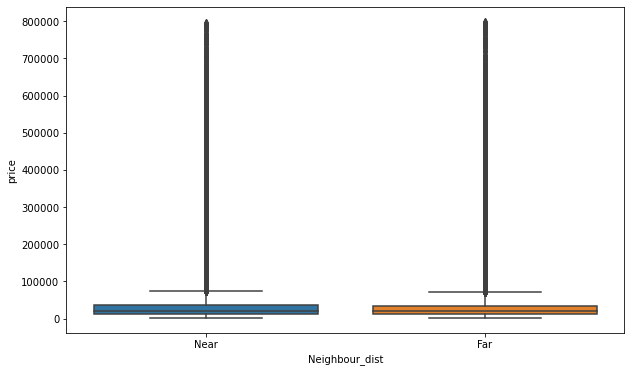

In [27]:
# neighbourhood distnace from metrostations/buststands or parks vs price
sns.boxplot(combined['Neighbour_dist'], combined['price'])

In [28]:
combined.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Neighbour_dist
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1.5,4716.0,Near
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,0.3,24969.0,Near
2,120243,2,RK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1.3,24146.0,Near
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3.6,36260.0,Far
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,0.2,176156.0,Near


In [29]:
combined.dtypes

Property_ID           int64
room                  int64
layout_type          object
property_type        object
locality             object
area                  int64
furnish_type         object
bathroom              int64
city                 object
parking_spaces        int64
floor                 int64
pet_friendly          int64
power_backup          int64
washing_machine       int64
air_conditioner       int64
geyser/solar          int64
security_deposit      int64
CCTV/security         int64
lift                  int64
neighbourhood       float64
price               float64
Neighbour_dist       object
dtype: object

In [30]:
# converting categroicla data which i stermed as numerical into categorical.

combined['parking_spaces'] = combined['parking_spaces'].astype('object')
combined['floor'] = combined['floor'].astype('object')
combined['pet_friendly'] = combined['pet_friendly'].astype('object')
combined['power_backup'] = combined['power_backup'].astype('object')
combined['washing_machine'] = combined['washing_machine'].astype('object')
combined['air_conditioner'] = combined['air_conditioner'].astype('object')
combined['geyser/solar'] = combined['geyser/solar'].astype('object')
combined['CCTV/security'] = combined['CCTV/security'].astype('object')
combined['lift'] = combined['lift'].astype('object')

<AxesSubplot:xlabel='room', ylabel='price'>

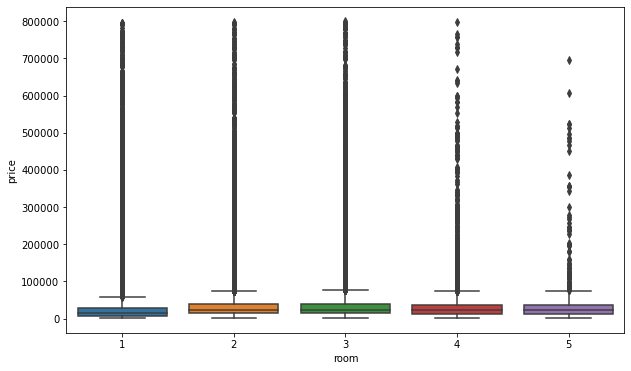

In [31]:
# room vs price

sns.boxplot(x = 'room', y = 'price', data = combined)

In [32]:
combined.groupby('room')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room,,,,,,,,
1,40845.0,31351.664439,62920.219946,1590.0,7590.00,14960.0,28284.00,796196.0
2,36676.0,39149.798969,59908.024849,1620.0,15287.00,24075.5,38948.25,798219.0
3,30682.0,40439.010690,64584.066264,1808.0,15236.25,24192.0,39636.50,799325.0
4,5474.0,38602.748265,65713.860041,1698.0,13083.25,21931.5,37124.00,799123.0
5,803.0,42211.078456,73825.909714,2350.0,13365.50,22791.0,37702.50,696716.0


<AxesSubplot:xlabel='bathroom', ylabel='price'>

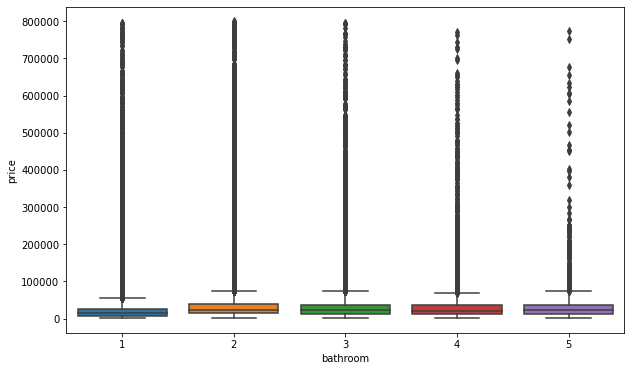

In [33]:
sns.boxplot(x = 'bathroom', y = 'price', data = combined)

In [34]:
combined.groupby('room')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room,,,,,,,,
1,40845.0,31351.664439,62920.219946,1590.0,7590.00,14960.0,28284.00,796196.0
2,36676.0,39149.798969,59908.024849,1620.0,15287.00,24075.5,38948.25,798219.0
3,30682.0,40439.010690,64584.066264,1808.0,15236.25,24192.0,39636.50,799325.0
4,5474.0,38602.748265,65713.860041,1698.0,13083.25,21931.5,37124.00,799123.0
5,803.0,42211.078456,73825.909714,2350.0,13365.50,22791.0,37702.50,696716.0


In [35]:
combined[['room', 'bathroom']] = combined[['room', 'bathroom']].astype('object')

<AxesSubplot:xlabel='city', ylabel='price'>

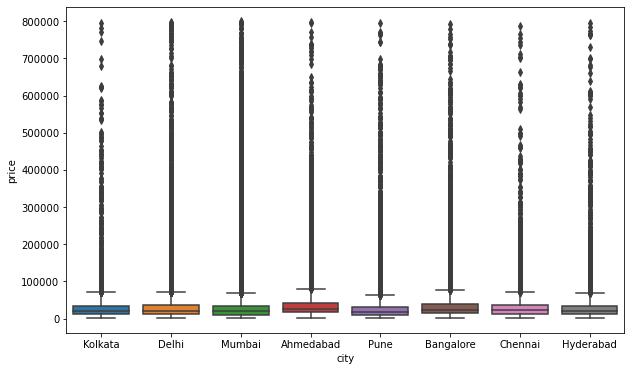

In [36]:
sns.boxplot(x = 'city', y = 'price', data = combined)

* **Doing pd.get_dummies will create 8 columns, it will complicate our analysis.
So, we will do the binning of city columns into north, west, south and east.**

In [37]:
# Dividing citites intoo north, eat west and south
east = ['Kolkata']
west = ['Pune', 'Mumbai']
north = ['Delhi', 'Ahmedabad']
south = ['Banglore', 'Chennai', "Hyderabad"]

In [38]:
def regions(x):
    if x in north:
        return "North"
    elif x in south:
        return 'South'
    elif x in east:
        return "East"
    elif x in west:
        return 'West'

In [39]:
combined["city_cat"] = combined.city.apply(regions)

In [40]:
combined["city_cat"].value_counts()

West     62623
North    35802
South    13371
East      6795
Name: city_cat, dtype: int64

In [41]:
combined['layout_type'].value_counts()

BHK    114684
RK      19999
Name: layout_type, dtype: int64

In [42]:
combined.groupby('room')['layout_type'].describe()

,count,unique,top,freq
room,,,,
1,47908,2,BHK,38204
2,43235,2,BHK,38418
3,36125,2,BHK,31709
4,6465,2,BHK,5555
5,950,2,BHK,798


In [43]:
combined.groupby('layout_type')['room'].describe()

,count,unique,top,freq
layout_type,,,,
BHK,114684,5,2,38418
RK,19999,5,1,9704


In [44]:
# converting RK into BHK where room no. >1

combined.loc[(combined.layout_type == 'RK') & (combined.room >1), 
             'layout_type'] = 'BHK'

In [45]:
# Fixingonberting RK with no. of bathroom greater than 1.,
# chnaging number of bathrooms to 1.

combined.loc[(combined.layout_type == 'RK') & (combined.bathroom >1), 'bathroom'] = '1'

In [46]:
combined.locality.nunique()

3706

In [47]:
combined.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Neighbour_dist,city_cat
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1.5,4716.0,Near,East
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,0.3,24969.0,Near,North
2,120243,2,BHK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1.3,24146.0,Near,West
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3.6,36260.0,Far,East
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,0.2,176156.0,Near,East


In [48]:
# split the data into train and test.
train

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1500,4716
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,300,24969
2,120243,2,RK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1300,24146
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3600,36260
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,200,176156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114475,10901,1,RK,Apartment,Nikol,9334,Unfurnished,1,Ahmedabad,1,17,1,0,0,0,0,552732,1,1,2200,92122
114476,185583,3,RK,Studio Apartment,Vadgaon Budruk,593,Semi-Furnished,1,Pune,0,15,1,0,1,1,0,28782,0,1,1700,14391
114477,112402,1,RK,Independent Floor,Palava,827,Furnished,1,Mumbai,0,4,0,1,0,1,1,7140,1,0,2400,2380
114478,18272,3,BHK,Apartment,Ghatlodiya,2268,Semi-Furnished,2,Ahmedabad,1,2,1,0,1,1,0,33416,1,0,2200,16708


In [49]:
# map the locality
encoded = train.groupby('locality')['price'].median()

In [50]:
combined['locality'].value_counts()

Thane West                     3127
Chembur                        2461
Andheri East                   2377
Bopal                          2054
Kharghar                       1819
                               ... 
Block ED Dakshini Pitampura       1
Khalapur                          1
Pandwalan Khurd                   1
Satellite Road                    1
Classic Paradise Layout           1
Name: locality, Length: 3706, dtype: int64

In [51]:
combined['locality'] = combined['locality'].map(encoded) 

In [52]:
combined['locality'].value_counts()

18998.0    3127
19233.0    2461
18955.5    2377
19029.0    2169
25863.5    2054
           ... 
14159.0       1
30662.0       1
20275.0       1
64777.0       1
21510.0       1
Name: locality, Length: 3382, dtype: int64

In [53]:
# mapping the furnish type
combined['furnish_type'].value_counts()

Semi-Furnished    63646
Unfurnished       41398
Furnished         29639
Name: furnish_type, dtype: int64

In [54]:
furnish_enc = train.groupby('furnish_type')['price'].median()
combined['furnish_type']= combined['furnish_type'].map(furnish_enc)

In [55]:
combined['furnish_type'].value_counts()

23718.0    63646
16047.0    41398
21404.0    29639
Name: furnish_type, dtype: int64

In [56]:
# frew encoding for floor
combined['floor_encoded'] = combined.floor.value_counts()/combined.shape[0]

In [57]:
combined.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Neighbour_dist,city_cat,floor_encoded
0,100361,4,BHK,Apartment,17264.0,805,21404.0,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1.5,4716.0,Near,East,0.035246
1,66785,2,BHK,Apartment,21215.0,1093,21404.0,2,Delhi,1,9,0,0,0,1,0,74907,1,1,0.3,24969.0,Near,North,0.052620
2,120243,2,BHK,Independent Floor,20929.0,1227,16047.0,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1.3,24146.0,Near,West,0.093724
3,96487,1,BHK,Apartment,20678.0,1022,21404.0,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3.6,36260.0,Far,East,0.065814
4,95695,2,BHK,Apartment,20678.0,1403,23718.0,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,0.2,176156.0,Near,East,0.061589


In [58]:
# imputing locality with a dummy number
combined.locality.fillna(-9999, inplace = True)

In [59]:
combined.groupby('floor')['price'].describe()
# there is no diff in avg price onn the basis of floor number

,count,mean,std,min,25%,50%,75%,max
floor,,,,,,,,
0,4031.0,38226.887869,64022.821530,1810.0,13424.00,22372.0,38164.50,782949.0
1,6041.0,37137.972852,65159.722254,1614.0,12177.00,20788.0,36027.00,796196.0
2,10804.0,35502.989263,64111.486726,1590.0,9893.00,18949.0,34543.00,798219.0
3,7533.0,34761.811762,63399.086911,1674.0,10271.00,19191.0,34263.00,780396.0
4,7046.0,35576.418393,61046.056676,1620.0,11019.50,20435.5,35522.50,792355.0
5,5893.0,36041.928559,59254.917307,1668.0,11889.00,20873.0,35793.00,756990.0
6,4946.0,37779.829357,61916.250196,1599.0,12696.75,21898.0,37452.50,787019.0
7,4203.0,36397.918630,60511.809365,1701.0,12700.00,21211.0,35866.50,799325.0
8,4495.0,36237.947275,62535.135661,1693.0,11594.00,21002.0,35290.00,799123.0


In [60]:
# dropping variables
combined.drop(['Property_ID', 'city', 'floor_encoded'], axis = 1, inplace = True)

In [61]:
# target encoding on floor
# since freq encoding didn't work very well as it fills the column with null values, 
# so we wil drop freq encoded column and will do target encoding
floor_enc = train.groupby('floor')['price'].median()
combined['floor_enc'] = combined.floor.map(floor_enc)

In [62]:
combined.isnull().sum()

room                    0
layout_type             0
property_type           0
locality                0
area                    0
furnish_type            0
bathroom                0
parking_spaces          0
floor                   0
pet_friendly            0
power_backup            0
washing_machine         0
air_conditioner         0
geyser/solar            0
security_deposit        0
CCTV/security           0
lift                    0
neighbourhood           0
price               20203
Neighbour_dist          0
city_cat            16092
floor_enc               0
dtype: int64

In [63]:
combined.property_type.unique()

array(['Apartment', 'Independent Floor', 'Independent House',
       'Studio Apartment', 'Villa', 'Penthouse'], dtype=object)

In [64]:
combined.groupby('property_type')['area'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartment,86819.0,1500.531635,1402.438179,81.0,773.00,1151.0,1625.00,13942.0
Independent Floor,25850.0,1468.648433,1426.029489,90.0,751.00,1087.0,1550.75,12786.0
Independent House,13408.0,1458.233592,1447.476796,104.0,741.00,1049.0,1511.25,13079.0
Penthouse,492.0,1410.014228,1488.929455,133.0,721.75,923.0,1419.50,11494.0
Studio Apartment,5723.0,1340.229425,1409.616379,100.0,698.00,842.0,1359.50,12070.0
Villa,2391.0,1350.099958,1391.392933,97.0,702.00,851.0,1388.00,11761.0


In [65]:
# lets replace independent floor  with independent House
combined.replace(to_replace = 'Independent Floor', value = 'Independent House', inplace = True)

In [66]:
combined.groupby('property_type')['area'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartment,86819.0,1500.531635,1402.438179,81.0,773.00,1151.0,1625.0,13942.0
Independent House,39258.0,1465.091395,1433.380669,90.0,748.00,1076.0,1536.0,13079.0
Penthouse,492.0,1410.014228,1488.929455,133.0,721.75,923.0,1419.5,11494.0
Studio Apartment,5723.0,1340.229425,1409.616379,100.0,698.00,842.0,1359.5,12070.0
Villa,2391.0,1350.099958,1391.392933,97.0,702.00,851.0,1388.0,11761.0


In [67]:
# we will have to fix the property type for RK
combined.loc[combined.layout_type == 'RK', 'property_type'].value_counts()

Apartment            5278
Independent House    3292
Studio Apartment      791
Villa                 289
Penthouse              54
Name: property_type, dtype: int64

In [68]:
# from above, we can see that penthouse, studio apartment and vill into aone as mean price is of same range.

combined.loc[(combined.layout_type == 'RK') & 
             (combined.property_type == 'Penthouse'), 'property_type'] = 'Studio Apartment'

In [69]:
combined.loc[(combined.layout_type == 'RK') & 
             (combined.property_type == 'Villa'), 'property_type'] = 'Studio Apartment'

In [70]:
#combining  penthouse, studio apartment and vill into category pf 'studio apartment'
combined.loc[combined.layout_type == 'RK', 'property_type'].value_counts()

Apartment            5278
Independent House    3292
Studio Apartment     1134
Name: property_type, dtype: int64

In [71]:
combined.drop('floor', axis = 1, inplace = True)

In [72]:
# chnaging bathroom into int data type
combined['bathroom'] = combined.bathroom.astype('int')

In [73]:
pd.get_dummies(combined, drop_first = True).shape

(134683, 26)

In [74]:
pd.get_dummies(combined, drop_first = True).columns

Index(['room', 'locality', 'area', 'furnish_type', 'bathroom',
       'parking_spaces', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security',
       'lift', 'neighbourhood', 'price', 'floor_enc', 'layout_type_RK',
       'property_type_Independent House', 'property_type_Penthouse',
       'property_type_Studio Apartment', 'property_type_Villa',
       'Neighbour_dist_Near', 'city_cat_North', 'city_cat_South',
       'city_cat_West'],
      dtype='object')

In [75]:
dummydata = pd.get_dummies(combined, drop_first = True)

In [76]:
train.shape, test.shape

((114480, 21), (20203, 20))

In [77]:
newtrain = dummydata.iloc[:train.shape[0]-1, :]
newtrain.shape
# iloc excludes the last value

(114479, 26)

In [78]:
newtrain = dummydata.loc[~(dummydata.price.isnull()), :]
newtest = dummydata.loc[dummydata.price.isnull(), :]

In [79]:
newtrain.shape, newtest.shape

((114480, 26), (20203, 26))

In [80]:
dummydata.select_dtypes(include = np.number).columns

Index(['room', 'locality', 'area', 'furnish_type', 'bathroom',
       'parking_spaces', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security',
       'lift', 'neighbourhood', 'price', 'floor_enc', 'layout_type_RK',
       'property_type_Independent House', 'property_type_Penthouse',
       'property_type_Studio Apartment', 'property_type_Villa',
       'Neighbour_dist_Near', 'city_cat_North', 'city_cat_South',
       'city_cat_West'],
      dtype='object')

In [81]:
# Num variabels: for train data

cols = ['locality', 'area', 'furnish_type', 'security_deposit', 'floor_enc', 'neighbourhood']
localdata = newtrain.loc[:, cols]

In [82]:
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans

In [83]:
model = KMeans(random_state=42)
visul = KElbowVisualizer(estimator=model, k = (2,10))

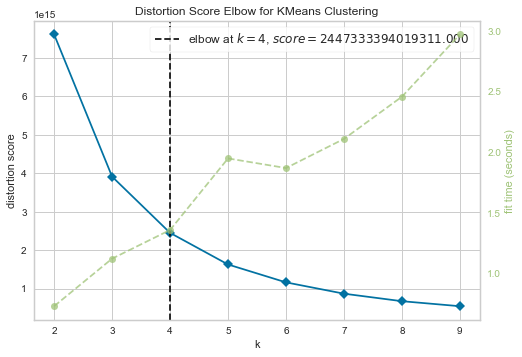

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
visul.fit(localdata)
visul.show()

In [85]:
# fitting the clustering model

kmeans = KMeans(n_clusters = 4, random_state= 42)
newtrain['clusters'] = kmeans.fit_predict(localdata)

In [86]:
# apply Anova to check the significance of the clustres created.
# Ho: That clusters labels have no significance wrt target
# Ha: That clusters labels have significance wrt target

from statsmodels.formula.api import ols
olsmodel = ols('price~clusters', data = newtrain).fit()

# print the anova table

from statsmodels.stats.anova import anova_lm
print(anova_lm(olsmodel))

# pval = 0 i.e. < 0.05, we wil reject the Null Hypothesis
# That is cluster have significance wrt Target.


                df        sum_sq       mean_sq           F  PR(>F)
clusters       1.0  2.464058e+13  2.464058e+13  6613.45662     0.0
Residual  114478.0  4.265249e+14  3.725824e+09         NaN     NaN


In [87]:
# Num variabels: for test data

col = ['locality', 'area', 'furnish_type', 'security_deposit', 'floor_enc', 'neighbourhood']
localtest = newtest.loc[:, col]

# fitting the clustering model

kmeans = KMeans(n_clusters = 4, random_state= 42)
newtest['clusters'] = kmeans.fit_predict(localtest)

## Model Building
* 1. Base Model - Avg of Price
* 2.  Decision Tree

In [88]:
pred = train.price.mean()

submission = pd.DataFrame({'Property_ID':test.Property_ID,
                          'price':pred})

submission.to_csv("BaseModel.csv", index = False)

In [89]:
from sklearn.model_selection import train_test_split

X = newtrain.drop('price', axis =1)
y = newtrain.price

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y , test_size= 0.2, 
                                               random_state = 1,
                                               stratify= newtrain['clusters'])

In [90]:
Xtest.shape

(22896, 26)

In [91]:
X.columns

Index(['room', 'locality', 'area', 'furnish_type', 'bathroom',
       'parking_spaces', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security',
       'lift', 'neighbourhood', 'floor_enc', 'layout_type_RK',
       'property_type_Independent House', 'property_type_Penthouse',
       'property_type_Studio Apartment', 'property_type_Villa',
       'Neighbour_dist_Near', 'city_cat_North', 'city_cat_South',
       'city_cat_West', 'clusters'],
      dtype='object')

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

VIF= pd.DataFrame()
VIF['feature']= X.columns
VIF['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# take a look
VIF



VIF.sort_values(by="VIF", ascending=False).head(100)


# VIF.loc[VIF["VIF"]>5]

# Based on the VIF we would now be dropping the top 3 columns which have vif greater than 5
## and try to predict our models once again and check agaain.

,feature,VIF
3,furnish_type,996.569776
9,air_conditioner,50.695248
8,washing_machine,8.651037
14,neighbourhood,3.740295
21,Neighbour_dist_Near,3.729381
24,city_cat_West,2.072194
22,city_cat_North,1.883495
23,city_cat_South,1.431940
15,floor_enc,1.254943
13,lift,1.244575


In [93]:
newtest.drop('price', axis = 1, inplace = True)

In [94]:
# xtrain=Xtrain.drop(["furnish_type","air_conditioner","washing_machine"],axis=1)

In [95]:
# newt=newtest.drop(["furnish_type","air_conditioner","washing_machine"],axis=1)

In [96]:
# xtest=Xtest.drop(["furnish_type","air_conditioner","washing_machine"],axis=1)


In [97]:
# xtrain.shape, newt.shape

In [98]:
# ## fitting base model for the limited data

# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error

# dtree1 = DecisionTreeRegressor()
# pred_dt1 = dtree1.fit(xtrain, ytrain).predict(newt)

sub = pd.DataFrame({'Property_ID':test.Property_ID,
                          'price':pred_dt1})

sub.to_csv("sub.csv", index = False)

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dtree = DecisionTreeRegressor()
pred_dt = dtree.fit(Xtrain, ytrain).predict(newtest)

#print("RMSE for {} model is {}".format('dtree', np.sqrt(mean_squared_error(ytest, model.predict(Xtest)))))

In [100]:
# submission = pd.DataFrame({'Property_ID':test.Property_ID,
#                           'price':pred_dt})

# submission.to_csv("DTModel.csv", index = False)

In [101]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor()
pred_rf = rf.fit(Xtrain, ytrain).predict(newtest)

#print("RMSE for {} model is {}".format('RandomForest', np.sqrt(mean_squared_error(ytest, model.predict(Xtest)))))

In [102]:
# light gbm

from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
pred_lgbm = lgbm.fit(Xtrain, ytrain).predict(newtest)
print("RMSE for {} model is {}".format('lgbm', np.sqrt(mean_squared_error(ytest, lgbm.predict(Xtest)))))

RMSE for lgbm model is 26658.119216228144


In [104]:
# fitting lgbm with the new features


# light gbm

from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
pred_lgbm = lgbm.fit(Xtrain, ytrain).predict(newtest)
print("RMSE for {} model is {}".format('lgbm', np.sqrt(mean_squared_error(ytest, lgbm.predict(Xtest)))))

RMSE for lgbm model is 26658.119216228144


In [105]:
# sub2 = pd.DataFrame({'Property_ID':test.Property_ID,
#                           'price':pred_lgbm})

# sub2.to_csv("sub2.csv", index = False)

In [106]:
#sub = pd.read_csv('submission.csv')

In [107]:
# submission = pd.DataFrame({'Property_ID':test.Property_ID,
#                           'price':pred_lgbm})

# submission.to_csv("LGBMModel.csv", index = False)

In [108]:
# light gbm

from xgboost import XGBRegressor
xgb = XGBRegressor()
pred_xgbm = xgb.fit(Xtrain, ytrain).predict(newtest)
#print("RMSE for {} model is {}".format('XGBM', np.sqrt(mean_squared_error(ytest, lgbm.predict(Xtest)))))

In [109]:
# # light gbm

# from xgboost import XGBRegressor
# xgb = XGBRegressor()
# pred_xgbm1 = xgb.fit(xtrain, ytrain).predict(newt)
# #print("RMSE for {} model is {}".format('XGBM', np.sqrt(mean_squared_error(ytest, lgbm.predict(Xtest)))))

In [110]:
# print("RMSE for {} model is {}".format('XGBM', np.sqrt(mean_squared_error(ytest, xgb.predict(xtest)))))

In [111]:
Xtrain.shape,ytrain.shape,newtest.shape

((91584, 26), (91584,), (20203, 26))

In [112]:
# print("RMSE for {} model is {}".format('XGBM', np.sqrt(mean_squared_error(ytest, xgb.predict(Xtest)))))

In [113]:
# submission = pd.DataFrame({'Property_ID':test.Property_ID,
#                           'price':pred_xgbm})

# submission.to_csv("XGBModel.csv", index = False)

In [114]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

kfold = KFold(n_splits = 5,shuffle = True)

gbm = GradientBoostingRegressor(random_state = 420)
pred_model = pd.DataFrame()

n =10
for i in range(n):
    folds = next(kfold.split(X))
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred_model[i] = gbm.fit(Xtrain, ytrain).predict(Xtest)
    
    
vals = pred_model.median(axis=1)
print("RMSE for {} model is {}:".format("10CV",
                                       np.sqrt(mean_squared_error(ytest,
                                                                 vals))))

RMSE for 10CV model is 60980.97257871361:


In [115]:
# stacking model with CV

level_0 =  [('dtree', dtree),('rf', rf), ('XGBM', xgb), ('LGBM', lgbm) ]

In [116]:
level_0 =  [('rf', rf),  ('GBM', gbm) ]

In [117]:
from sklearn.ensemble import StackingRegressor

In [118]:
stack = StackingRegressor(estimators= level_0, final_estimator= gbm)

pred_model = pd.DataFrame()

n =10
for i in range(n):
    folds = next(kfold.split(X))
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred_model[i] = gbm.fit(Xtrain, ytrain).predict(newtest)
    
    
vals = pred_model.median(axis=1)
#print("RMSE for {} model is {}:".format("Stacking Model",
                                       #np.sqrt(mean_squared_error(ytest,
                                       #                          gmb.predict(Xtest)))))

In [119]:
vals

0        36846.616071
1        35492.179288
2        36434.325925
3        36462.209248
4        36862.355627
             ...     
20198    35332.742887
20199    36512.352870
20200    36465.484363
20201    36530.359776
20202    36580.307792
Length: 20203, dtype: float64

In [120]:
# submission = pd.DataFrame({'Property_ID':test.Property_ID,
#                           'price':vals})

# submission.to_csv("StackModel.csv", index = False)


In [121]:
test.shape

(20203, 20)